### EV surge 2025: Predicting EV Adoption And Trends with ML and Visual Insights

            Global_Sales
Year                    
2012-01-01        120000
2013-01-01        200000
2014-01-01        320000
2015-01-01        550000
2016-01-01        770000
2017-01-01       1100000
2018-01-01       1600000
2019-01-01       2300000
2020-01-01       3100000
2021-01-01       4500000
2022-01-01       6200000
2023-01-01      10200000


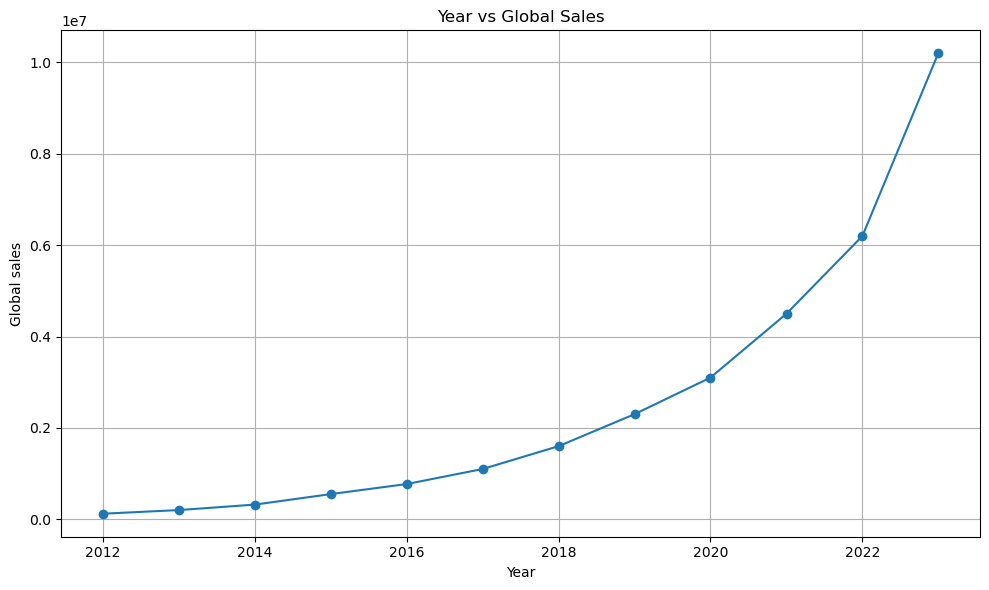


📊 Model Evaluation on Test Data:
 - RMSE: 4456110.25
 - MAE : 4085818.18
 -R squared: -3.9642296427917074


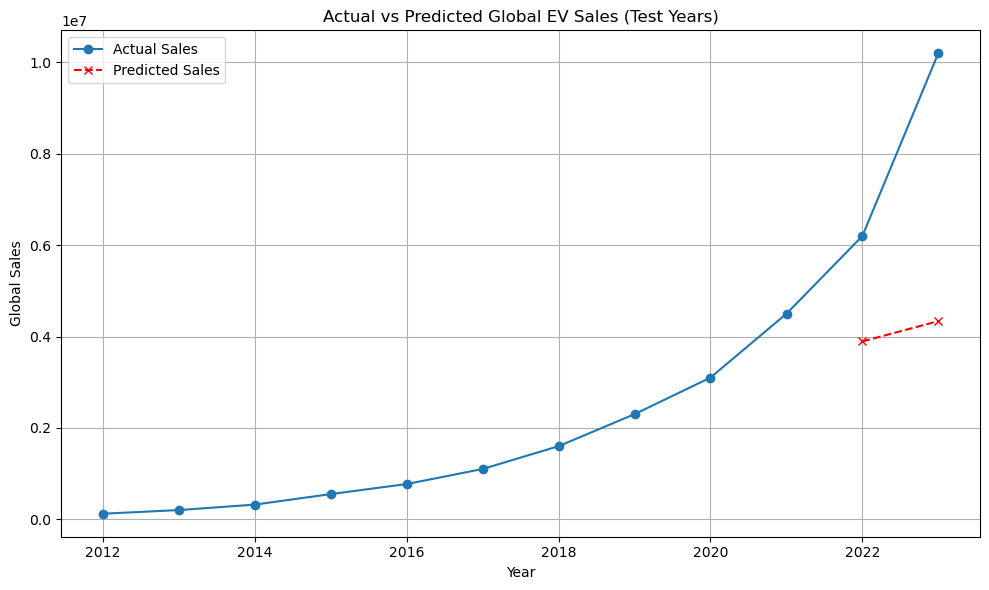

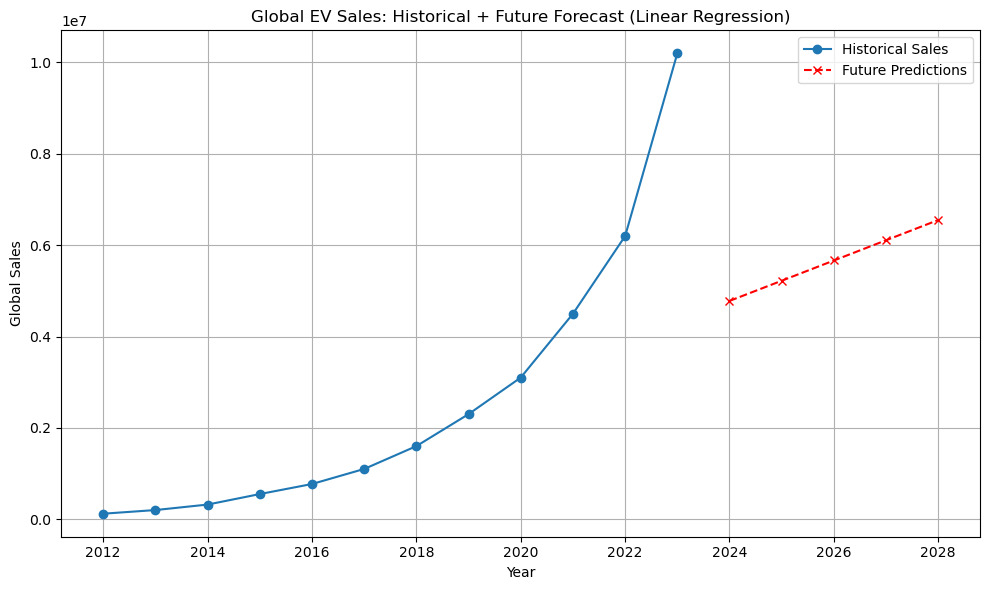

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
ev_sales_df = pd.read_csv("../Datasets/IEA_Global_EV_Data_2024.csv")

# convert and format the year column
ev_sales_df["Year"] = pd.to_datetime(ev_sales_df["Year"], format="%Y")

# set "Year" as the index
ev_sales_df.set_index("Year", inplace=True)
print(ev_sales_df)

# visualization
plt.figure(figsize=(10,6))
plt.plot(ev_sales_df.index, ev_sales_df["Global_Sales"], marker="o")
plt.title("Year vs Global Sales")
plt.xlabel("Year")
plt.ylabel("Global sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# advanced visualization
fig = px.line(ev_sales_df, x=ev_sales_df.index, y="Global_Sales", title="Global Sales vs Year")
fig.show()

# prepare data for modeling
# train-test-split
# train the model
# predict on test set
# evaluate the model
# plot actual vs predicted
# predict the future sales for next 5 years
# combine future predictions wiht existing prediction
# plot the future predictions

# Prepare data for modeling

# Extract the year as numeric values from the datetime index
X = ev_sales_df.index.year.values.reshape(-1, 1)  # Shape: (n_samples, 1)

# Target variable: Global EV sales
y = ev_sales_df['Global_Sales'].values  # Shape: (n_samples,)

# Use train_test_split to preserve time order (last 2 years as test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, shuffle=False)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"\n📊 Model Evaluation on Test Data:")
print(f" - RMSE: {rmse:.2f}")
print(f" - MAE : {mae:.2f}")
print(f" -R squared: {r_squared}")


# Convert test years from integer to datetime for plotting
test_years = pd.to_datetime(X_test.flatten(), format='%Y')

# Plot actual vs predicted on test data
plt.figure(figsize=(10, 6))
plt.plot(ev_sales_df.index, y, label='Actual Sales', marker='o')  # Full actual sales history
plt.plot(test_years, y_pred, label='Predicted Sales', marker='x', linestyle='--', color='red')  # Predictions for test set
plt.title('Actual vs Predicted Global EV Sales (Test Years)')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict the next 5 years
last_year = X[-1][0]
# Create a list of the next 5 years
future_years = np.array([last_year + i for i in range(1, 6)]).reshape(-1, 1)
future_preds = model.predict(future_years)

# Convert future years to datetime format
future_index = pd.to_datetime(future_years.flatten(), format='%Y')

# Create a new DataFrame with predicted future sales
future_df = pd.DataFrame({'Global_Sales': future_preds}, index=future_index)

# Combine historical and future predictions
combined_df = pd.concat([ev_sales_df[['Global_Sales']], future_df])

# Plot both historical data and future predictions
plt.figure(figsize=(10, 6))
plt.plot(ev_sales_df.index, ev_sales_df['Global_Sales'], label='Historical Sales', marker='o')  # Past actual sales
plt.plot(future_df.index, future_df['Global_Sales'], label='Future Predictions', marker='x', linestyle='--', color='red')  # Future predictions
plt.title('Global EV Sales: Historical and Future Forecast (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()